In [1]:
import grafiti as gf
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import collections
import scanpy as sc
import pandas

import warnings
warnings.filterwarnings('ignore')

model_path = "spectrum_model"
annotated_output = "spectrum_sappy.h5ad"
fov_key = "spectrum_fov_id"
target_key = "status_plus"
retrain = True

/Users/ceglian/miniforge3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read("/Users/ceglian/GitHub/sapp2/notebooks/datasets/SPECTRUM_squidpy.h5ad")

In [3]:
status_plus = ["{}_{}".format(x,y) for x,y in zip(adata.obs["consensus_signature"],adata.obs["wgd_status"])]
adata.obs["status_plus"] = status_plus

adata = adata[adata.obs["status_plus"].isin(["HRD-Dup_Non-WGD","HRD-Dup_WGD"])]
adata = adata[adata.obs["tumor_supersite"].isin(["Adnexa"])]

df = adata.obs
for x in set(adata.obs["tumor_supersite"]):
    dfx = df[df["tumor_supersite"] == x]
    print(x, len(set(dfx["spectrum_fov_id"])))


set(adata.obs["status_plus"])

Adnexa 228


{'HRD-Dup_Non-WGD', 'HRD-Dup_WGD'}

In [6]:
import cellcharter as cc
cc.gr.remove_long_links(adata)

 captum (see https://github.com/pytorch/captum).


In [8]:
gae = gf.ml.GAE(adata,layers=[50,50], lr=0.05, exponent=2,distance_scale=10)# if not retrain:
#     gae.load(model_path)

Generating PyTorch Geometric Dataset...
Setting up Model...
Ready to train!


In [10]:
gae.train(220, update_interval=1, threshold=1e-3)

Epoch 0 ** iteration 0 ** Loss: 36727.53125
Epoch 1 ** iteration 1 ** Loss: 34180.5
Epoch 2 ** iteration 2 ** Loss: 31753.23046875
Epoch 3 ** iteration 3 ** Loss: 29477.138671875
Epoch 4 ** iteration 4 ** Loss: 27355.134765625
Epoch 5 ** iteration 5 ** Loss: 25378.857421875
Epoch 6 ** iteration 6 ** Loss: 23535.404296875
Epoch 7 ** iteration 7 ** Loss: 21806.837890625
Epoch 8 ** iteration 8 ** Loss: 20166.310546875
Epoch 9 ** iteration 9 ** Loss: 18563.580078125
Epoch 10 ** iteration 10 ** Loss: 16909.802734375
Epoch 11 ** iteration 11 ** Loss: 15127.845703125
Epoch 12 ** iteration 12 ** Loss: 13214.3193359375
Epoch 13 ** iteration 13 ** Loss: 11272.208984375
Epoch 14 ** iteration 14 ** Loss: 9408.7587890625
Epoch 15 ** iteration 15 ** Loss: 7628.7255859375
Epoch 16 ** iteration 16 ** Loss: 5819.38134765625
Epoch 17 ** iteration 17 ** Loss: 3822.378173828125
Epoch 18 ** iteration 18 ** Loss: 1827.72216796875
Epoch 19 ** iteration 19 ** Loss: 564.2723388671875
Epoch 20 ** iteration 20 *

In [11]:
gae.load_embedding(adata)
adata.write("spectrum.h5ad")

In [12]:
gf.tl.umap(adata)
adata.write("spectrum.h5ad")

In [13]:
from sklearn.mixture import GaussianMixture
def find_motifs_gmm(adata, cluster_key='grafiti_motif', prefix="GrafitiMotif", embedding_key="X_grafiti",k=10,max_iter=10):
    gm = GaussianMixture(n_components=k, random_state=0, max_iter=max_iter,verbose=True).fit(adata.obsm[embedding_key])
    adata.obs[cluster_key] = ["{}{}".format(prefix,x) for x in gm.predict(adata.obsm[embedding_key]).tolist()]
    return gm
gm = find_motifs_gmm(adata,k=15)
adata.write("spectrum.h5ad")

Initialization 0
  Iteration 10
Initialization converged: False


In [23]:
adata.obs

,Image,spectrum_fov_id,spectrum_sample_id,tme_inclusion_status,cell_type,phenotype_full,phenotype,x0,y0,patient_id,...,frac_wgd_cells,wgd_status,is_wgd,wgd_clonality,is_clonal_wgd,is_subclonal_wgd,is_nonwgd,tumor_megasite_consensus_signature_short,status_plus,grafiti_motif
cell_id,,,,,,,,,,,,,,,,,,,,,
"SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[48880,11697] - resolution #1_1",SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,Yes,Unknown,panCK-CD8-CD68-PD1-PDL1-TOX-,Unknown,610.90,204.46,SPECTRUM-OV-003,...,1.885714,WGD,True,Clonal WGD,True,False,False,Adnexa_HRD,HRD-Dup_WGD,GrafitiMotif1
"SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[48880,11697] - resolution #1_2",SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,Yes,Unknown,panCK-CD8-CD68-PD1-PDL1-TOX-,Unknown,640.13,319.65,SPECTRUM-OV-003,...,1.885714,WGD,True,Clonal WGD,True,False,False,Adnexa_HRD,HRD-Dup_WGD,GrafitiMotif0
"SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[48880,11697] - resolution #1_3",SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,Yes,Unknown,panCK-CD8-CD68-PD1-PDL1-TOX-,Unknown,533.63,347.52,SPECTRUM-OV-003,...,1.885714,WGD,True,Clonal WGD,True,False,False,Adnexa_HRD,HRD-Dup_WGD,GrafitiMotif2
"SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[48880,11697] - resolution #1_4",SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,Yes,Unknown,panCK-CD8-CD68-PD1-PDL1-TOX-,Unknown,541.67,348.09,SPECTRUM-OV-003,...,1.885714,WGD,True,Clonal WGD,True,False,False,Adnexa_HRD,HRD-Dup_WGD,GrafitiMotif11
"SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[48880,11697] - resolution #1_5",SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,SPECTRUM-OV-003_S1_LEFT_ADNEXA_CD68_TOX_PD1_PD...,Yes,Unknown,panCK-CD8-CD68-PD1-PDL1-TOX-,Unknown,542.00,357.14,SPECTRUM-OV-003,...,1.885714,WGD,True,Clonal WGD,True,False,False,Adnexa_HRD,HRD-Dup_WGD,GrafitiMotif14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[58119,11309] - resolution #1_11743",SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL...,SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL...,SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL...,Yes,Unknown,panCK-CD8-CD68-PD1-PDL1-TOX-,Unknown,949.96,984.96,SPECTRUM-OV-022,...,0.113861,Non-WGD,False,Non-WGD,False,False,True,Adnexa_HRD,HRD-Dup_Non-WGD,GrafitiMotif14
"SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[58119,11309] - resolution #1_11744",SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL...,SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL...,SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL...,Yes,panCK+,panCK+CD8-CD68-PD1-PDL1-TOX-,panCK+PDL1-,968.54,985.10,SPECTRUM-OV-022,...,0.113861,Non-WGD,False,Non-WGD,False,False,True,Adnexa_HRD,HRD-Dup_Non-WGD,GrafitiMotif14
"SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[58119,11309] - resolution #1_11745",SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL...,SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL...,SPECTRUM-OV-022_S1_LEFT_OVARY_CD68_TOX_PD1_PDL...,Yes,CD8+,panCK-CD8+CD68-PD1-PDL1-TOX-,CD8+PD1-TOX-,662.99,985.26,SPECTRUM-OV-022,...,0.113861,Non-WGD,False,Non-WGD,False,False,True,Adnexa_HRD,HRD-Dup_Non-WGD,GrafitiMotif8


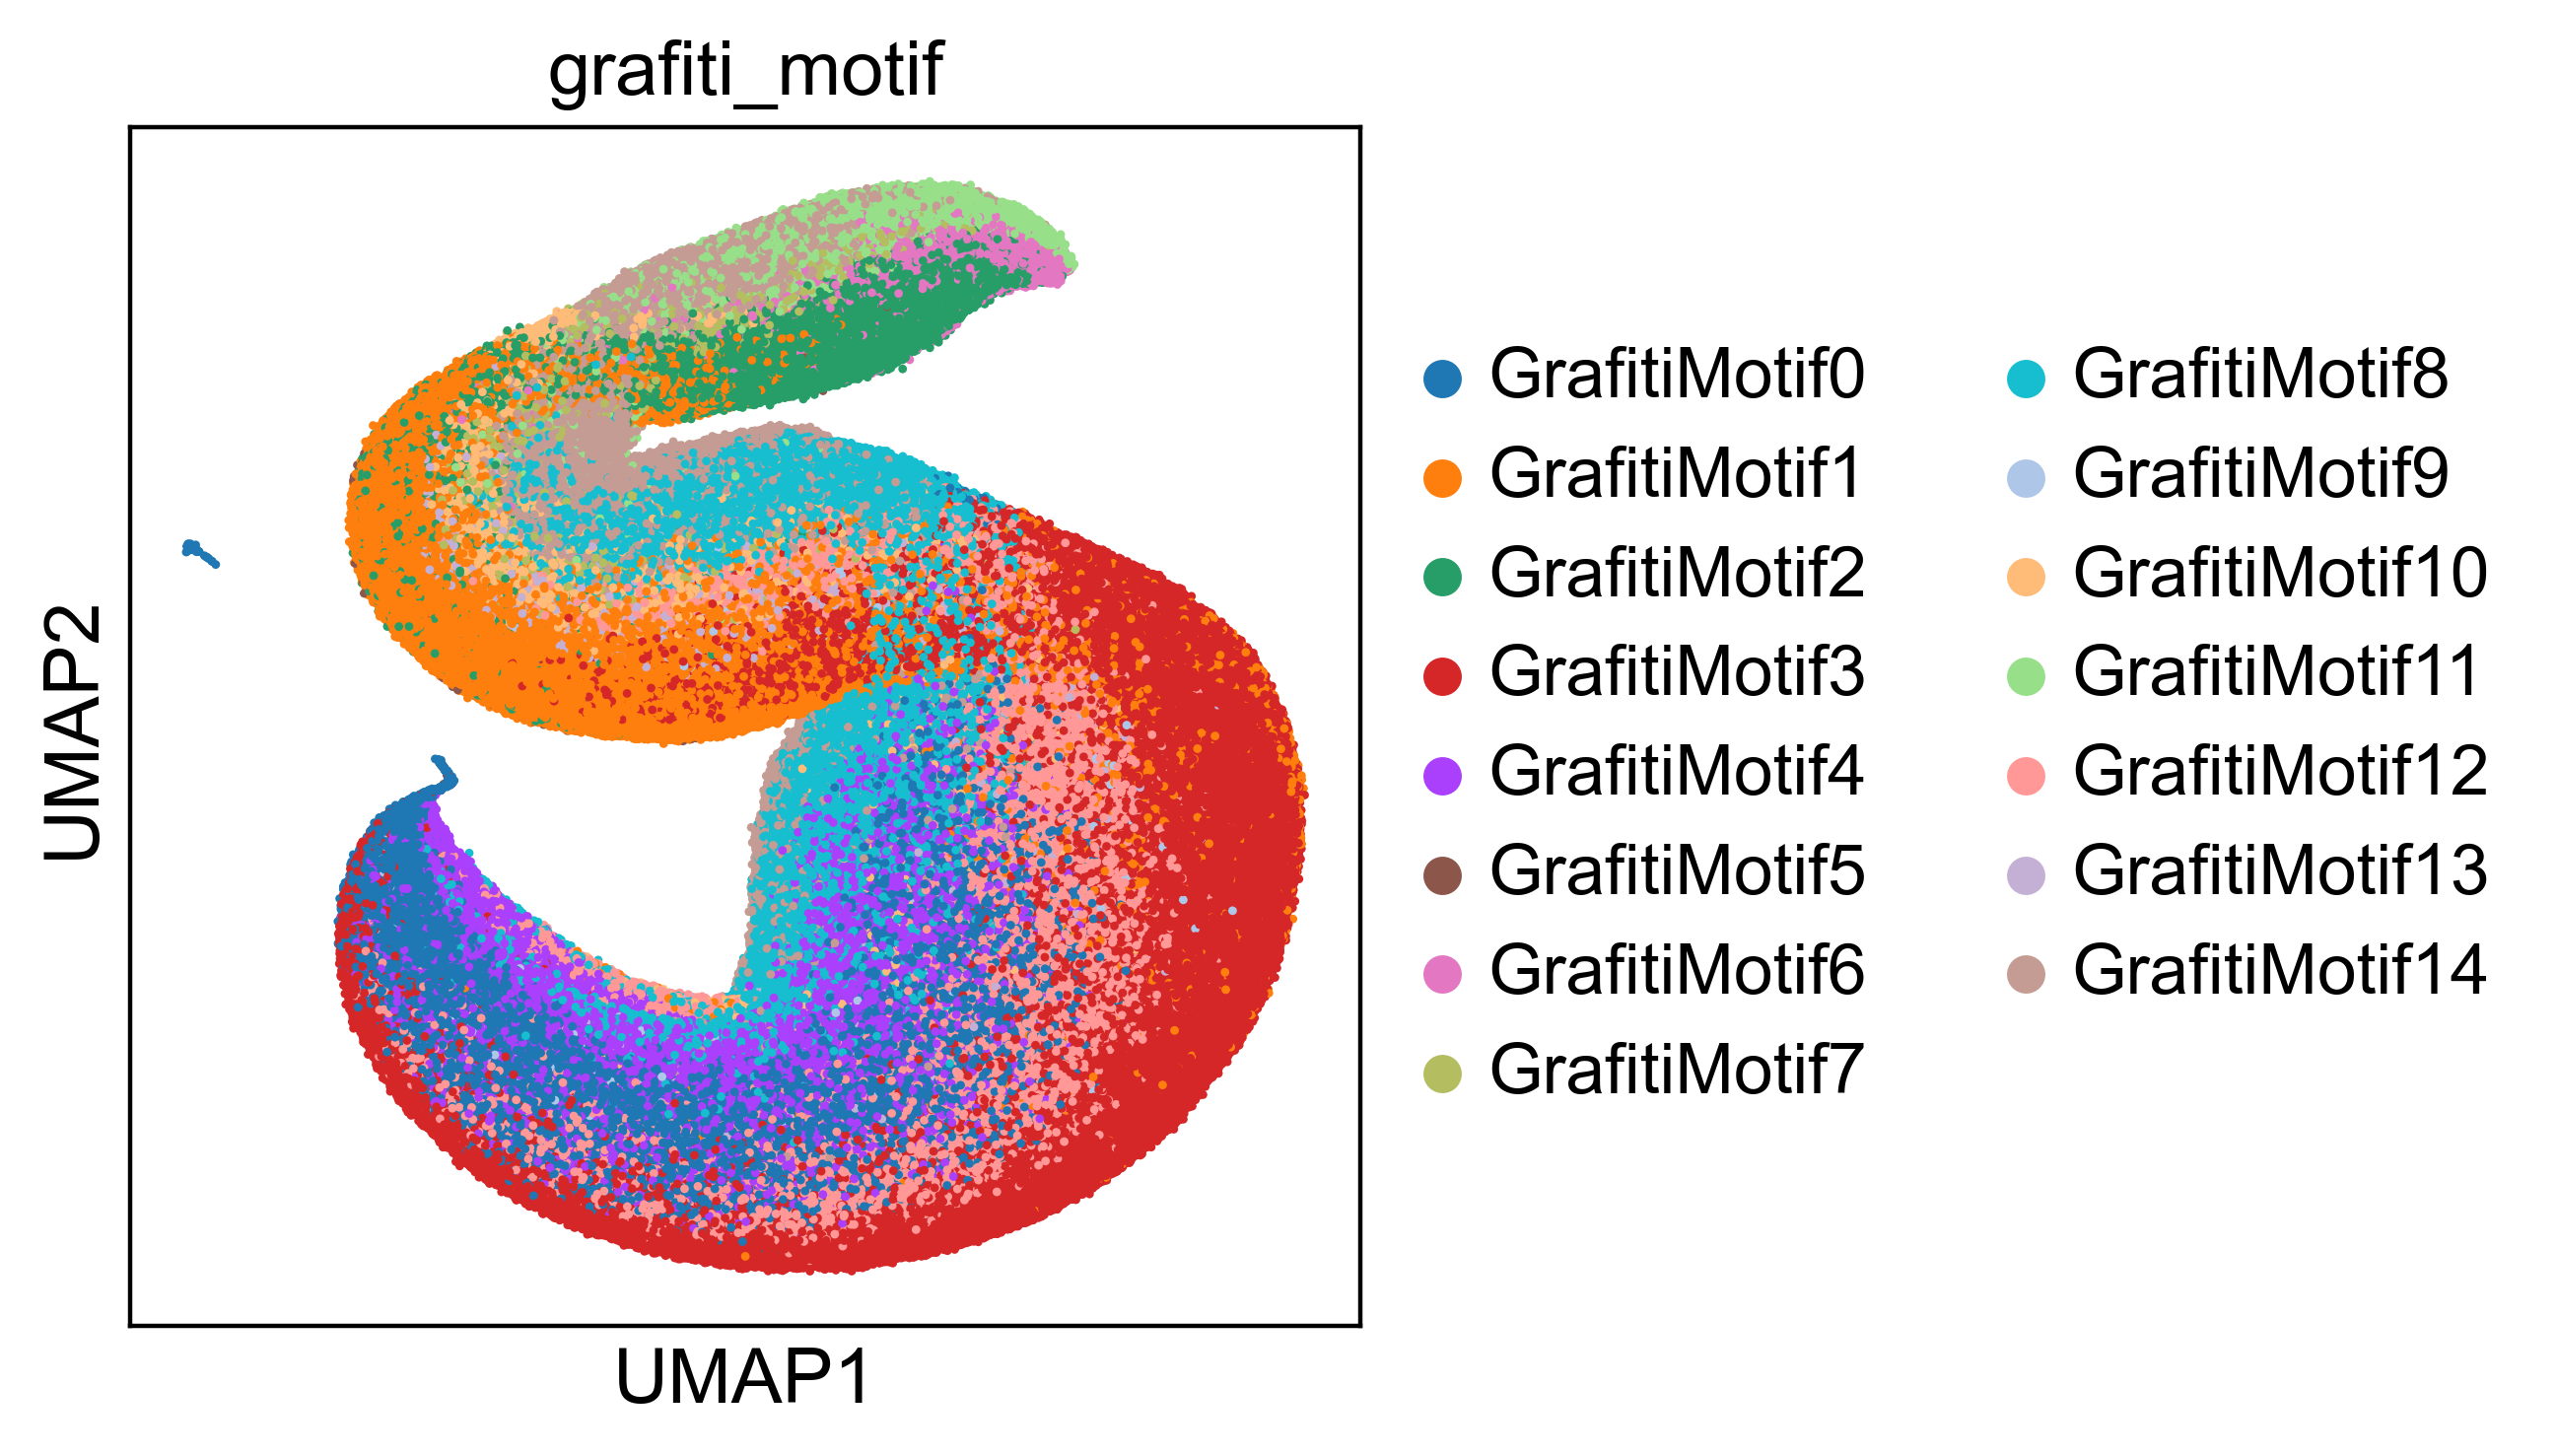

In [27]:
sc.pl.umap(adata,color="grafiti_motif",s=10)

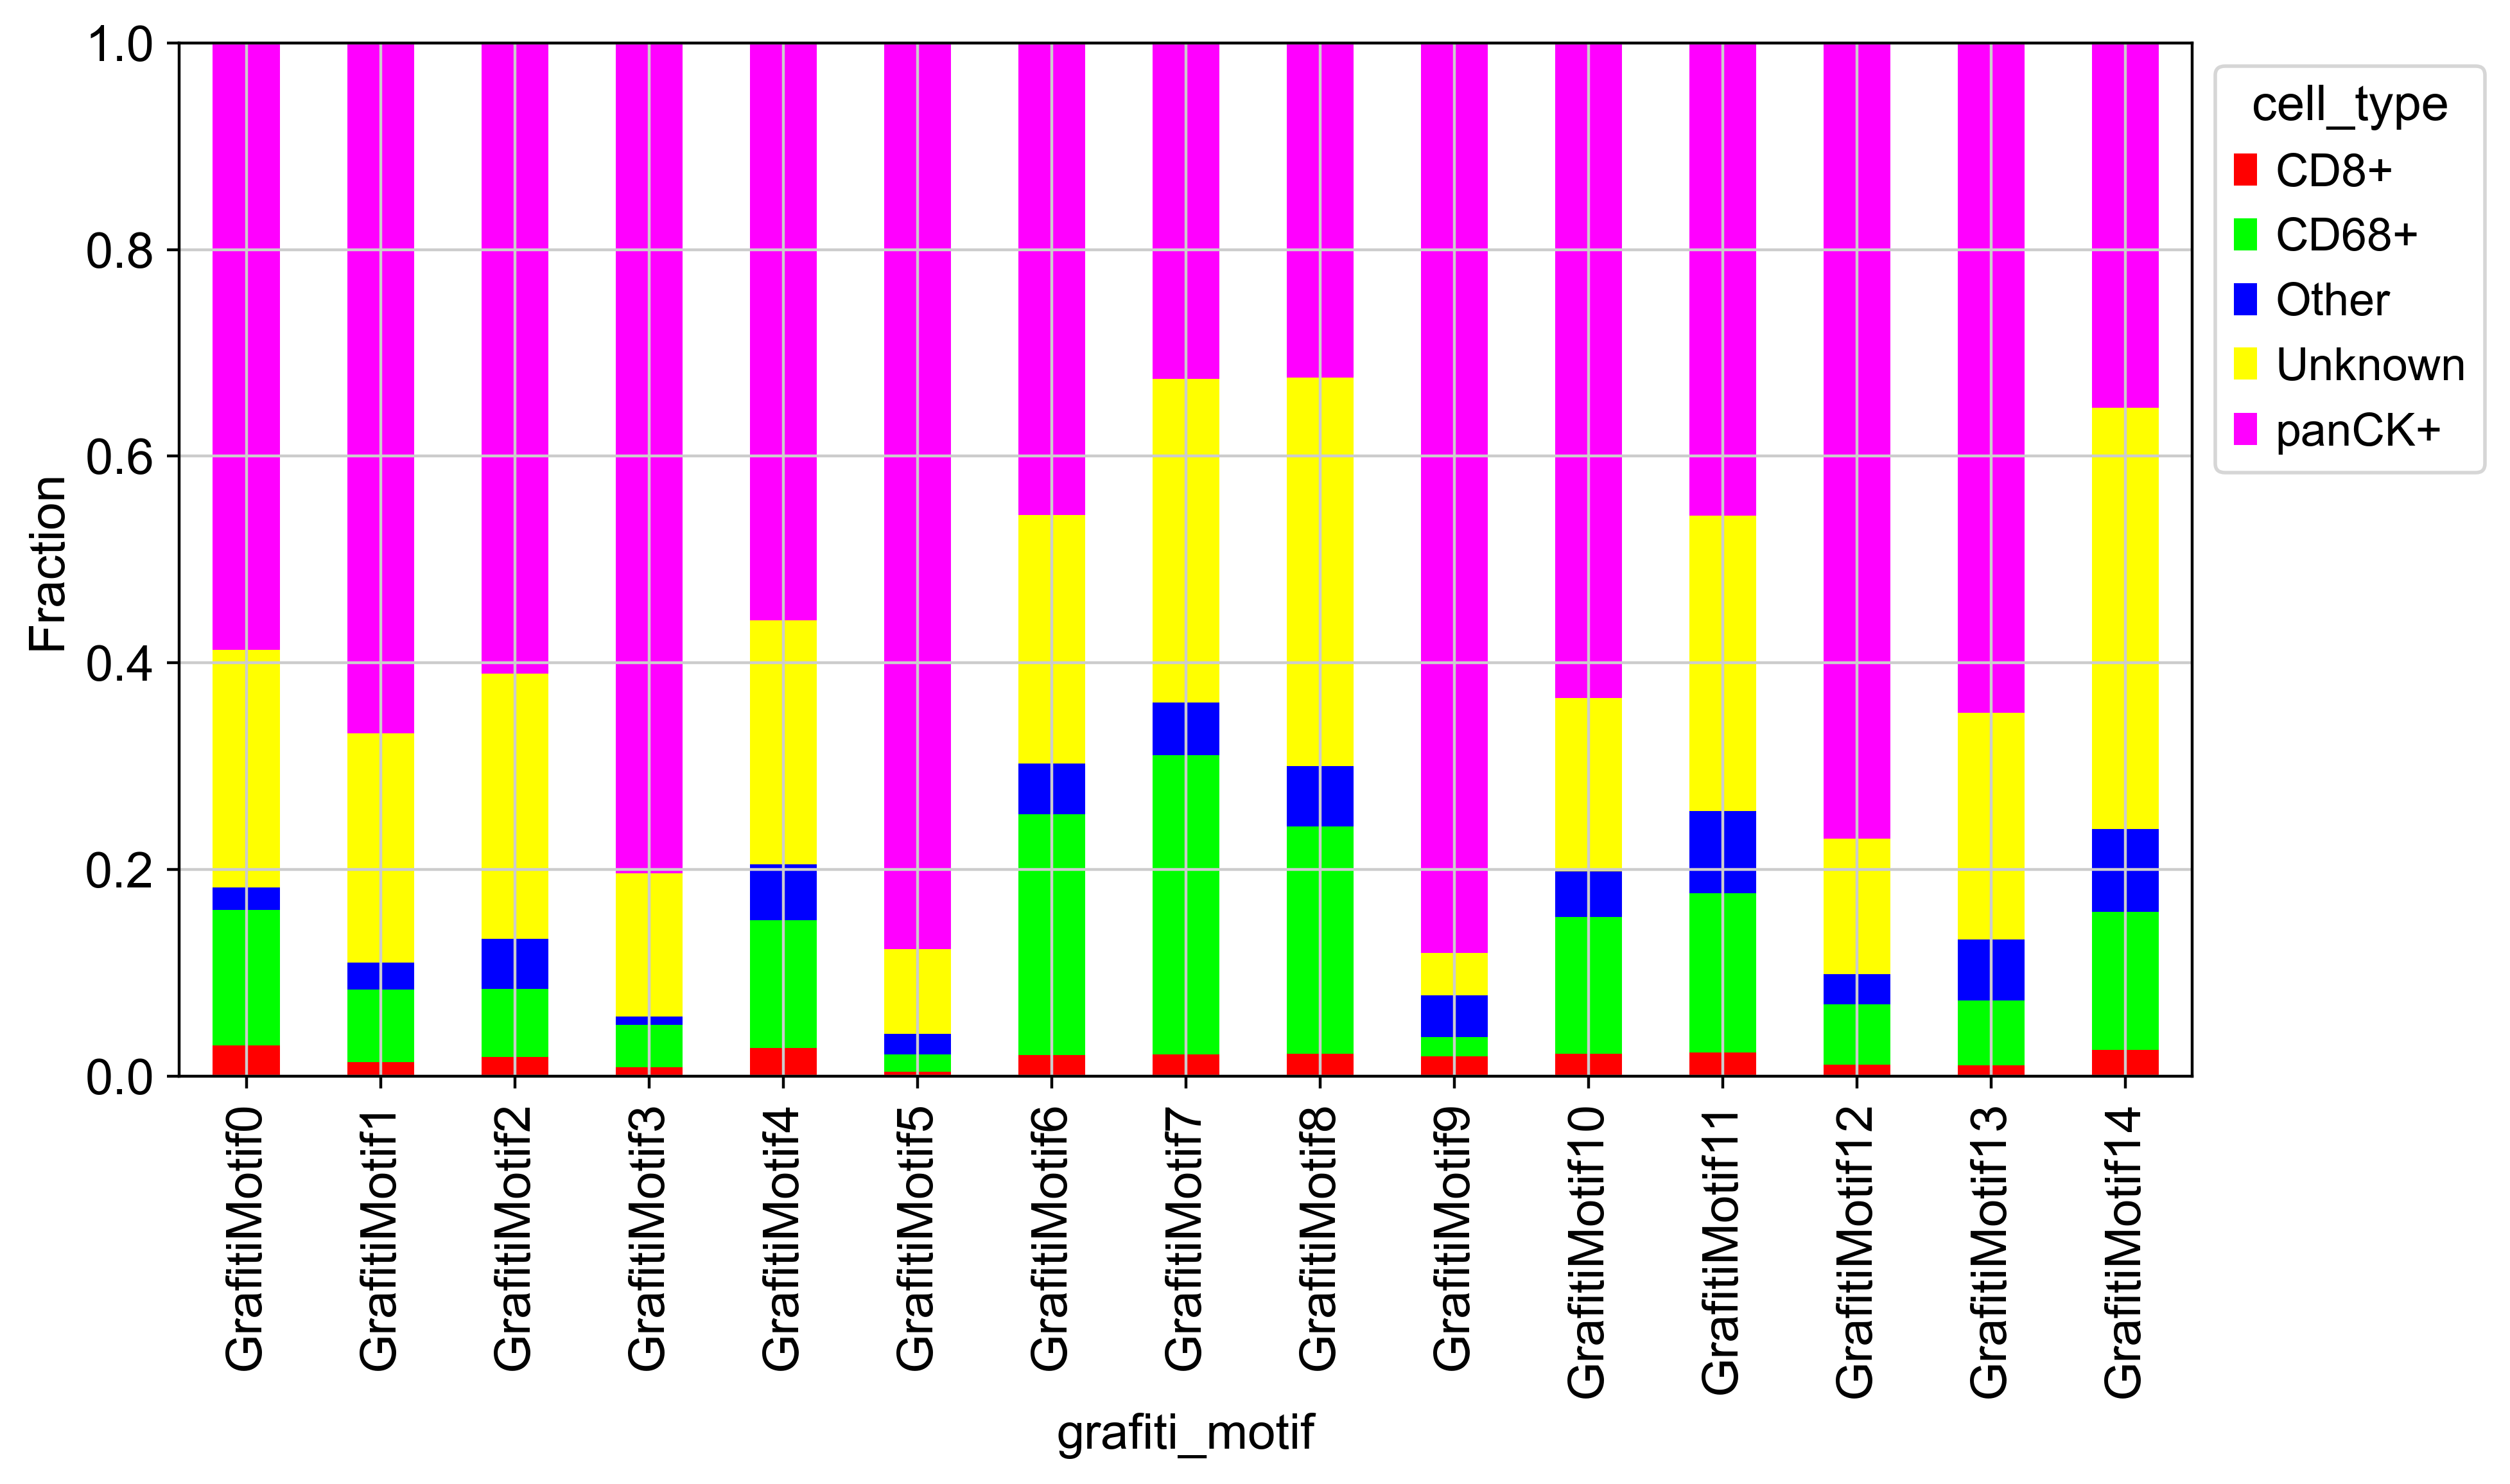

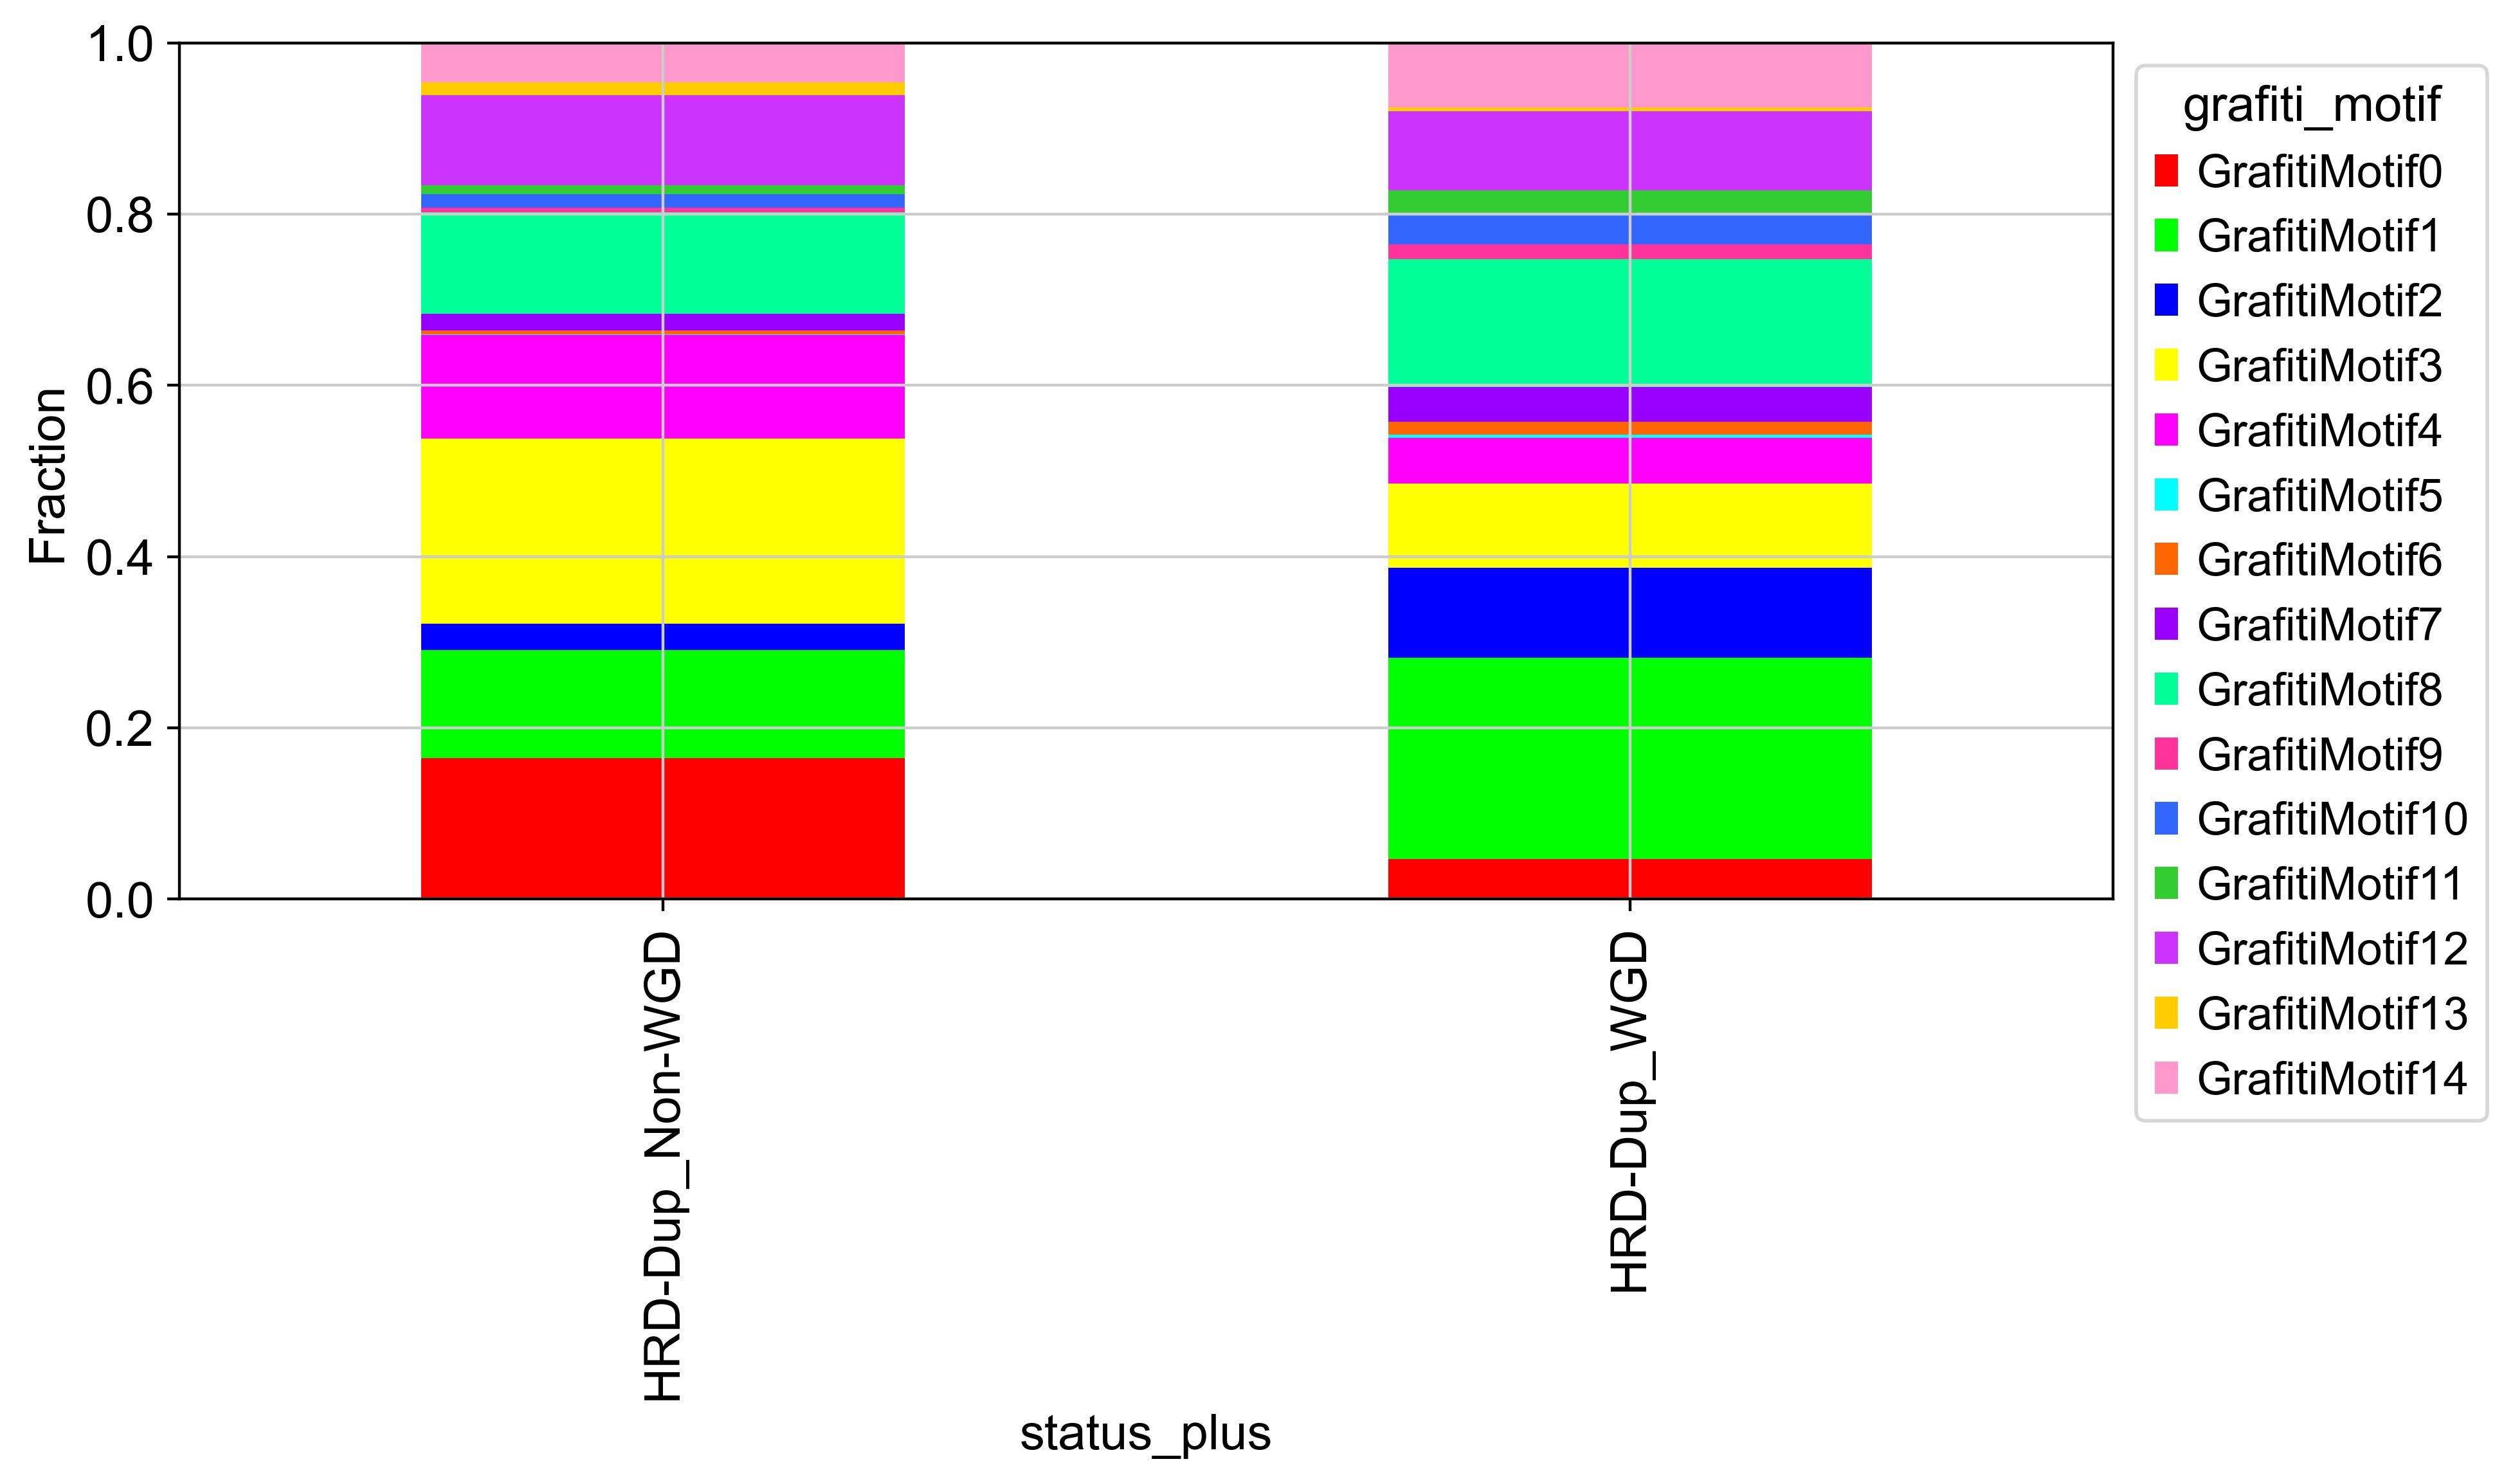

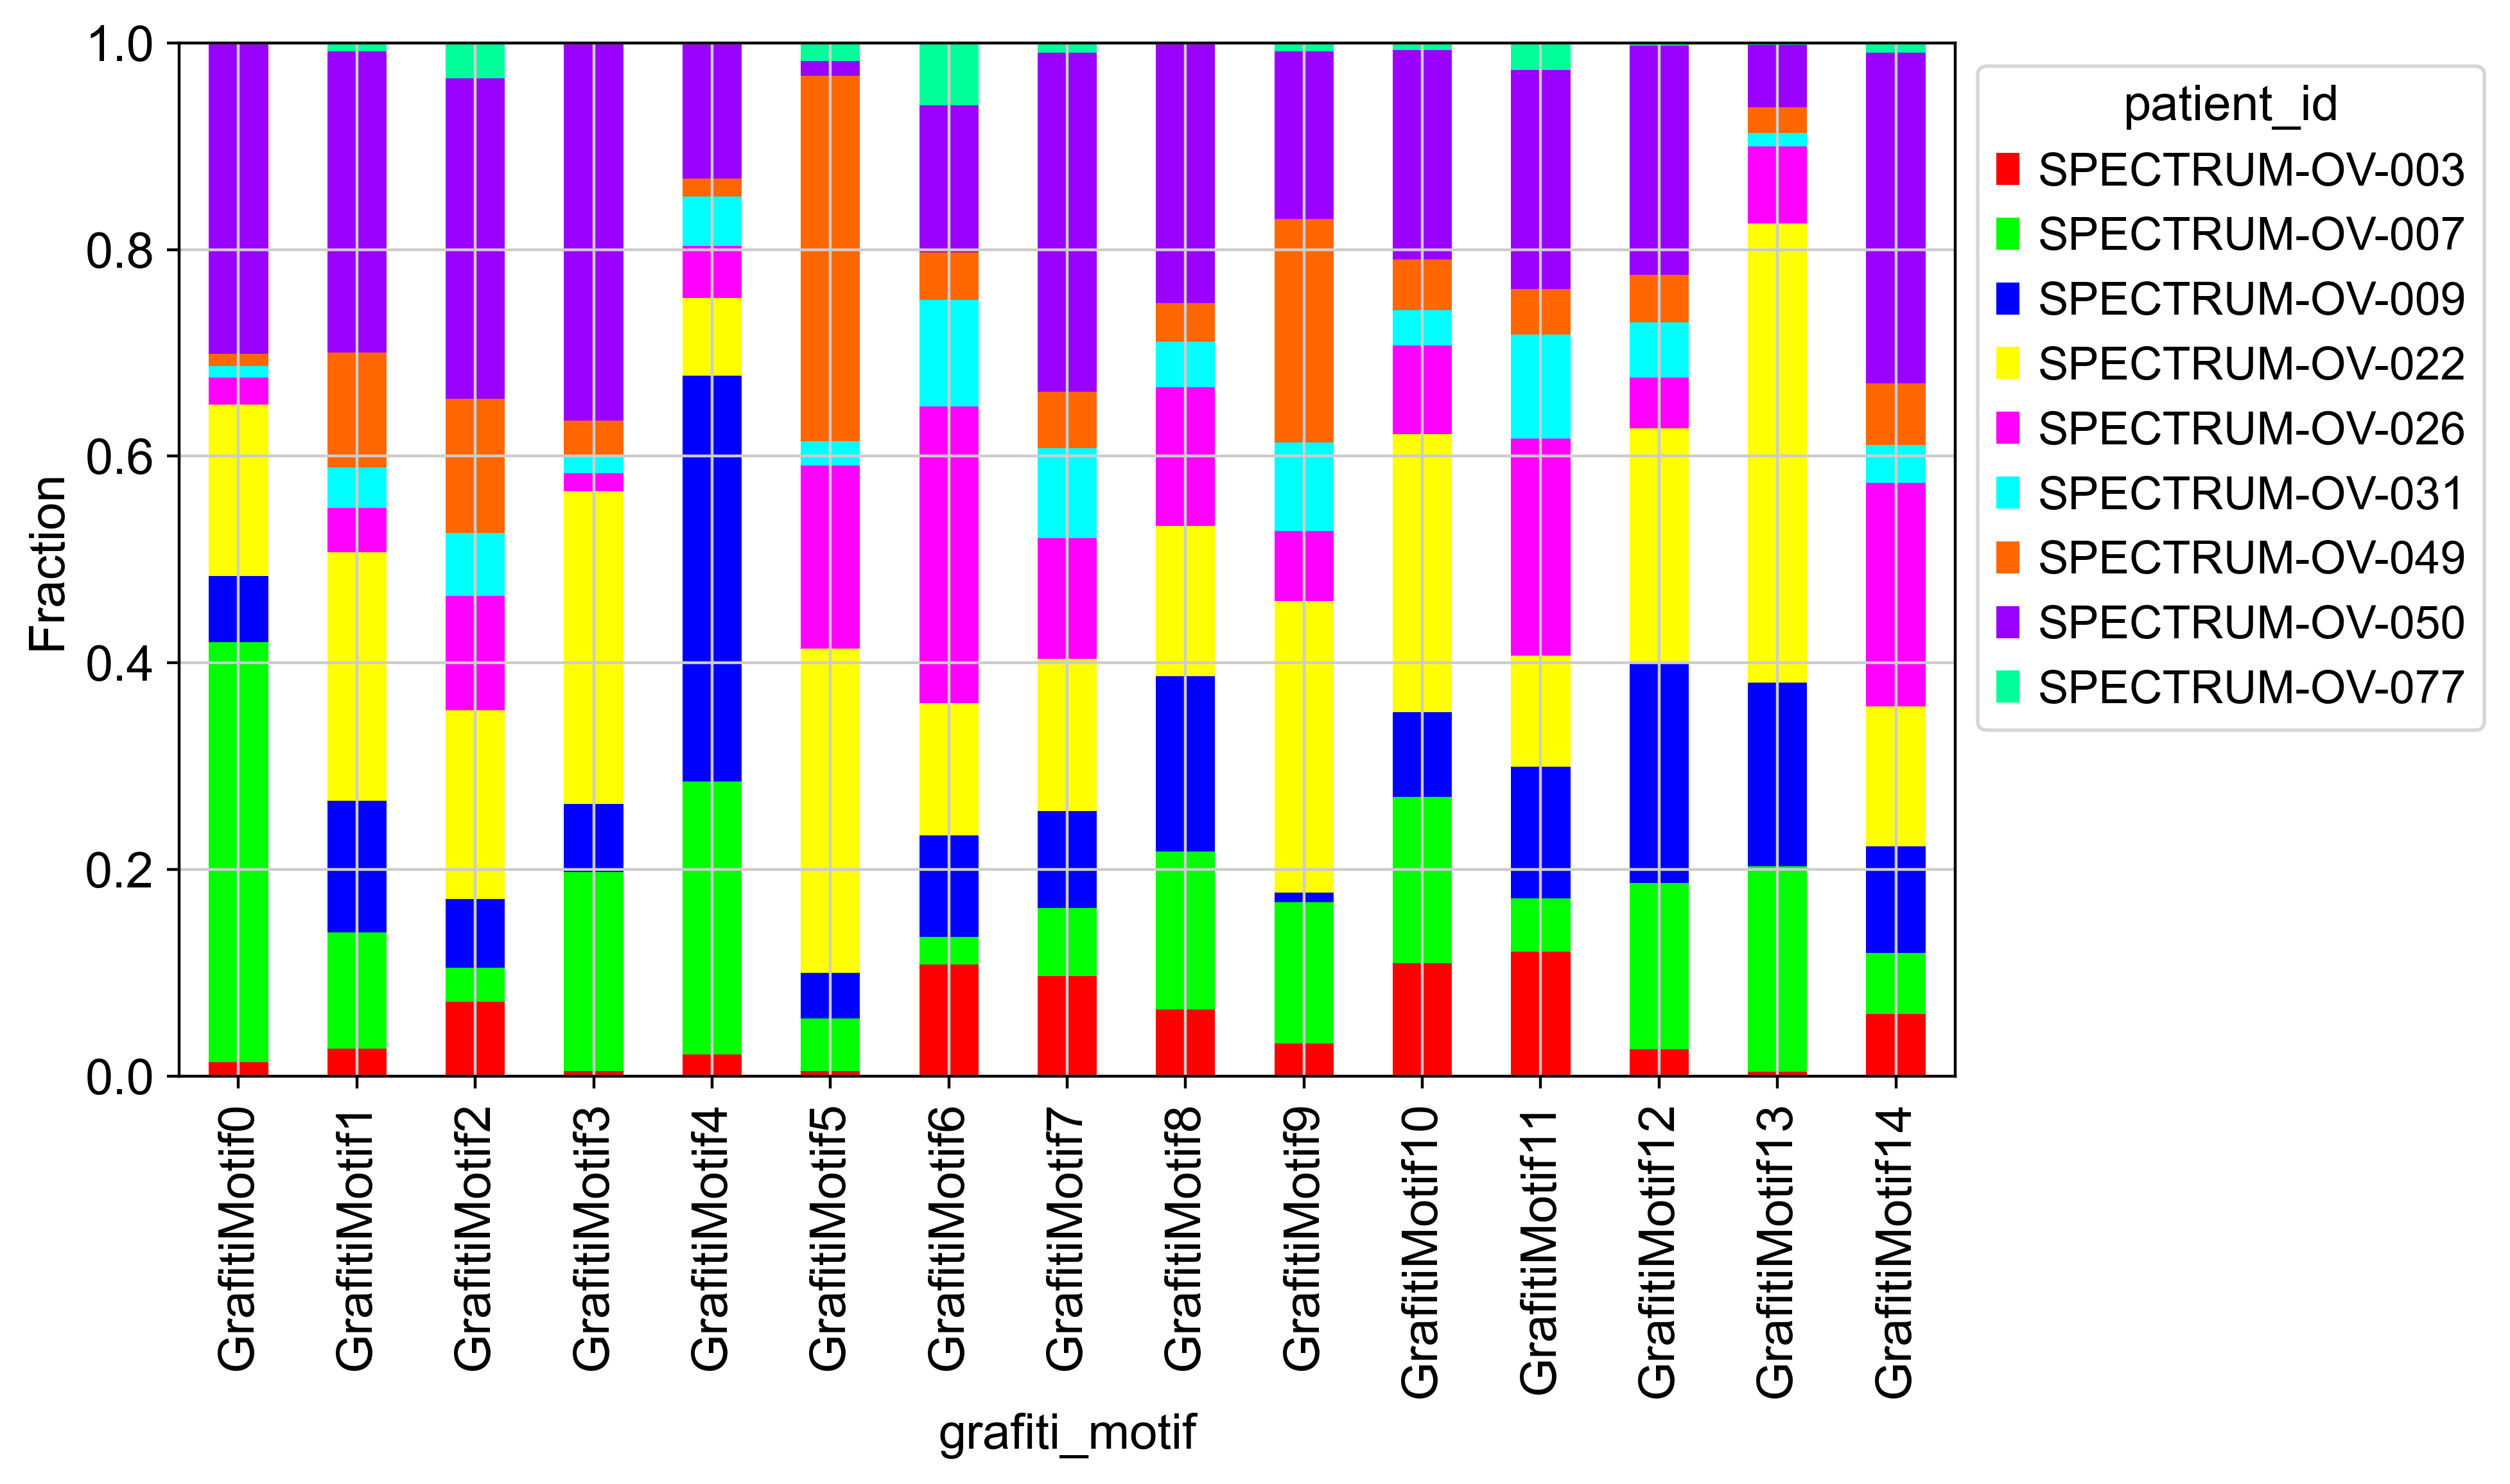

In [26]:
gf.pl.plot_fraction(adata,category="grafiti_motif",variable="cell_type")
gf.pl.plot_fraction(adata,category="status_plus",variable="grafiti_motif")
gf.pl.plot_fraction(adata,category="grafiti_motif",variable="patient_id")

In [29]:
xdata = adata[adata.obs["status_plus"]=="HRD-Dup_Non-WGD"]
vids = list(set(xdata.obs["spectrum_fov_id"]))[0:24]
print(vids)
gf.pl.plot_fov_graph(adata, fov_id=vids,cluster_key="grafiti_motif", fov_key='spectrum_fov_id', s=10, n_cols=4, figsize=(12,12), bbox_to_anchor=(1.2,0.9), save="/Users/ceglian/gwgd.pdf")

['SPECTRUM-OV-050_S1_RIGHT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[58885,12167]', 'SPECTRUM-OV-026_S1_RIGHT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[41217,8858]', 'SPECTRUM-OV-050_S1_RIGHT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[52164,11228]', 'SPECTRUM-OV-022_S1_RIGHT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[44931,9028]', 'SPECTRUM-OV-050_S1_RIGHT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[52280,8522]', 'SPECTRUM-OV-022_S1_RIGHT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[45057,10570]', 'SPECTRUM-OV-007_S1_RIGHT_FALLOPIAN_TUBE_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[54232,9233]', 'SPECTRUM-OV-022_S1_RIGHT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[45429,6507]', 'SPECTRUM-OV-022_S1_RIGHT_ADNEXA_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[46667,6038]', 'SPECTRUM-OV-007_S1_RIGHT_FALLOPIAN_TUBE_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1_[49072,9225]', 'SPECTRUM-OV-050_S1_LEFT_OVARY_CD68_TOX_PD1_PDL1_CD8_panCK-CK8-18_DAPI_R1

In [ ]:
xdata = adata[adata.obs["status_plus"]=="HRD-Dup_WGD"]
vids = list(set(xdata.obs["spectrum_fov_id"]))[0:24]
print(vids)
gf.pl.plot_fov_graph(adata, fov_id=vids,cluster_key="grafiti_motif", fov_key='spectrum_fov_id', s=10, n_cols=4, figsize=(12,12), bbox_to_anchor=(1.2,0.9), save="/Users/ceglian/gwgd.pdf")